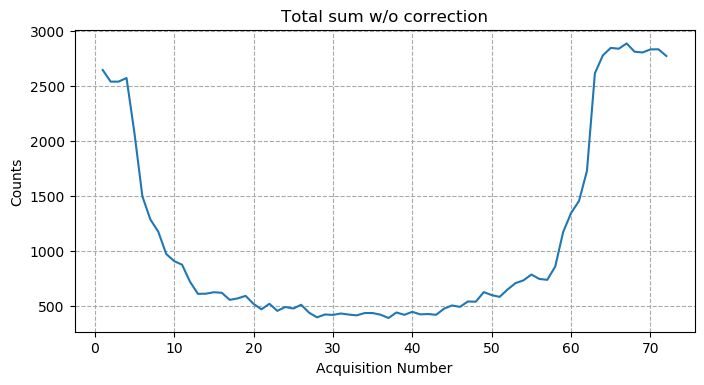

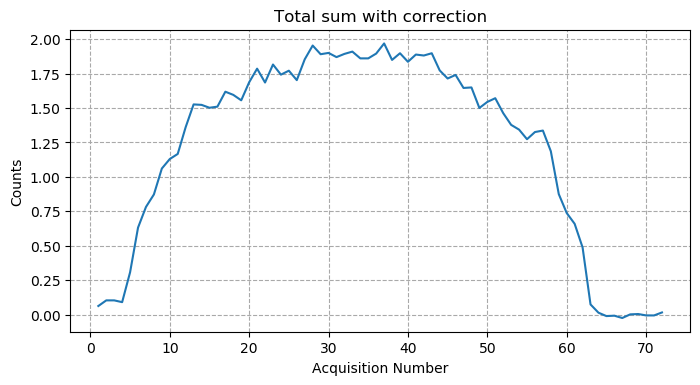

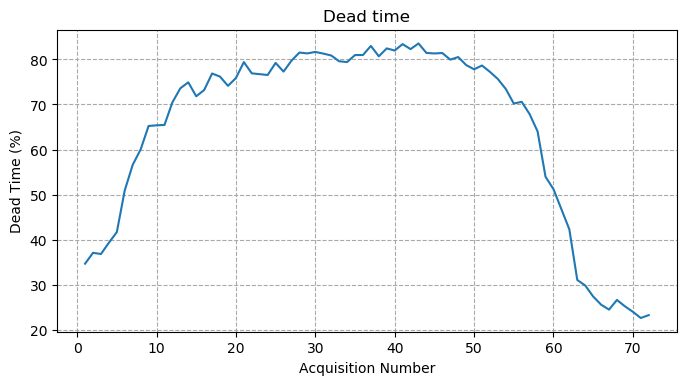

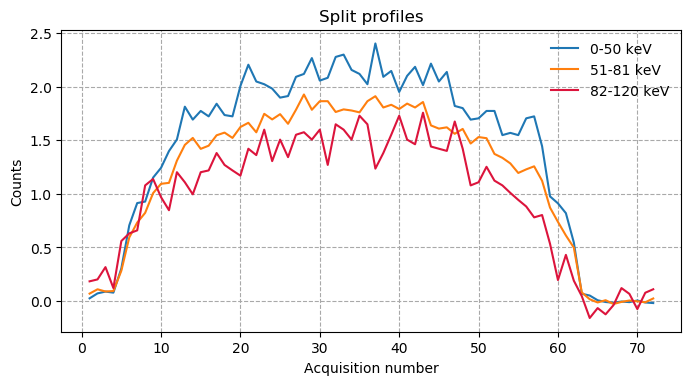

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure



tot_counts=[]
for i in np.arange(1,73):
    counts = genfromtxt("Desktop/CT imaging/12-5-2021/acq_{:02d}.mca".format(i), skip_header=16,skip_footer=71)
    tot_counts.append(sum(counts))
    counts=0

x= np.arange(1,73)

figure(figsize=(8, 4), dpi=100)
plt.plot(x,tot_counts)
plt.xlabel('Acquisition Number')
plt.ylabel('Counts')
plt.title('Total sum w/o correction')
plt.grid(color='darkgrey',linestyle='--')

airscan_counts= sum(genfromtxt("Desktop/CT imaging/12-5-2021/Air scan.mca", skip_header=16,skip_footer=71))

P=[]
for i in np.arange(0,72):
    P.append(-np.log(tot_counts[i]/airscan_counts))

figure(2,figsize=(8, 4), dpi=100)
plt.plot(x,P)
plt.xlabel('Acquisition Number')
plt.ylabel('Counts')
plt.title('Total sum with correction')
plt.grid(color='darkgrey',linestyle='--')

deadtime=[]
for i in np.arange(1,73):
    deadtime.append(genfromtxt("Desktop/CT imaging/12-5-2021/acq_{:02d}.mca".format(i), skip_header=1106,max_rows=1, comments='%',usecols=2))

figure(3,figsize=(8,4), dpi=100)
plt.plot(x,deadtime)
plt.xlabel('Acquisition Number')
plt.ylabel('Dead Time (%)')
plt.title('Dead time')
plt.grid(color='darkgrey',linestyle='--')

tot_counts_1=[]
for i in np.arange(1,73):
    counts = genfromtxt("Desktop/CT imaging/12-5-2021/acq_{:02d}.mca".format(i), skip_header=16,max_rows=340)
    tot_counts_1.append(sum(counts))
    counts=0
    
tot_counts_2=[]
for i in np.arange(1,73):
    counts = genfromtxt("Desktop/CT imaging/12-5-2021/acq_{:02d}.mca".format(i), skip_header=356,skip_footer=545)
    tot_counts_2.append(sum(counts))
    counts=0
    
tot_counts_3=[]
for i in np.arange(1,73):
    counts = genfromtxt("Desktop/CT imaging/12-5-2021/acq_{:02d}.mca".format(i), skip_header=566,skip_footer=71)
    tot_counts_3.append(sum(counts))
    counts=0
    

airscan_counts1= sum(genfromtxt("Desktop/CT imaging/12-5-2021/Air scan.mca", skip_header=16,max_rows=340))
airscan_counts2= sum(genfromtxt("Desktop/CT imaging/12-5-2021/Air scan.mca", skip_header=356,skip_footer=545))
airscan_counts3= sum(genfromtxt("Desktop/CT imaging/12-5-2021/Air scan.mca", skip_header=566,skip_footer=71))
P1=[]
for i in np.arange(0,72):
    P1.append(-np.log(tot_counts_1[i]/airscan_counts1))
    
P2=[]
for i in np.arange(0,72):
    P2.append(-np.log(tot_counts_2[i]/airscan_counts2))
    
P3=[]
for i in np.arange(0,72):
    P3.append(-np.log(tot_counts_3[i]/airscan_counts3))


figure(4,figsize=(8,4),dpi=100)
plt.plot(x,P1,label='0-50 keV')
plt.plot(x,P2, label='51-81 keV')
plt.plot(x,P3, label='82-120 keV',color='crimson')
plt.title('Split profiles')
plt.xlabel('Acquisition number')
plt.ylabel('Counts')
plt.legend(frameon=False)
plt.grid(color='darkgrey',linestyle='--')